In [1]:
# Make animations with instructions here:
# http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

# Interact:
# http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

# %pylab inline

# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# from scipy.integrate import odeint
# import scipy.special as special

Populating the interactive namespace from numpy and matplotlib


In [9]:
#%matplotlib inline
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

print plt.get_backend()

from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib
module://ipykernel.pylab.backend_inline


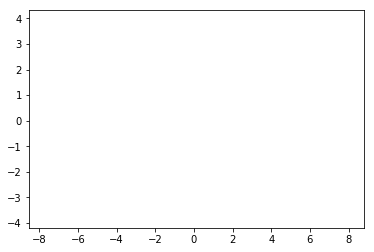

In [14]:
t = np.linspace(0, 50, 400)
x = 8.*(1-0.5*t/t[-1])*np.cos(t)
y = 4.*(1-0.5*t/t[-1])*np.sin(t)

fig, ax = plt.subplots()
    
ims = []
for i in range(400):
    ims.append(ax.plot(x[max(0, i-100):i], y[max(0, i-100):i], c='k', ls='-'))
    #ims.append(ax.plot(x[0:i], y[0:i], c='gray', ls='-'))

im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=0,
                                   blit=True)

In [15]:
HTML(im_ani.to_html5_video())

In [2]:
# from ipywidgets import interact, interactive, fixed, interact_manual
# import ipywidgets as widgets

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#plt.switch_backend('qt4agg')
#plt.switch_backend('tkagg')
plt.switch_backend('nbagg')
#%matplotlib inline

plt.get_backend()

u'nbAgg'

<IPython.core.display.Javascript object>


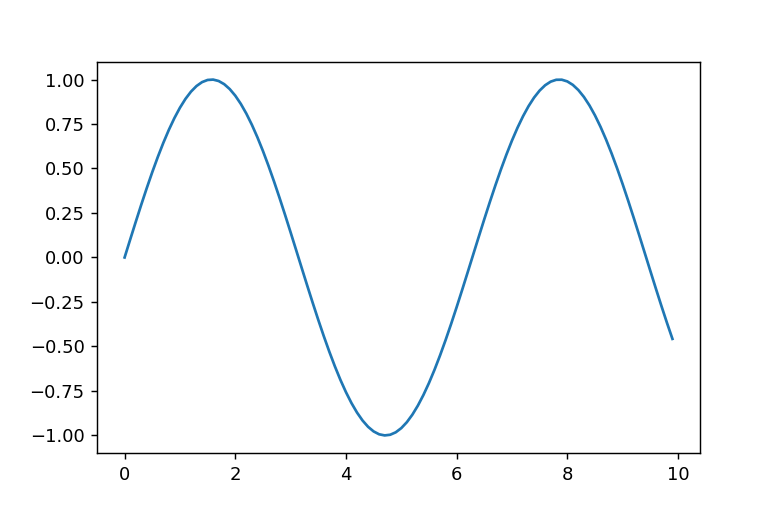

In [7]:
x = np.arange(0, 10, 0.1)
y = np.sin(x)
fig, axes = plt.subplots(1)
axes.plot(x, y)
fig.show()

<IPython.core.display.Javascript object>


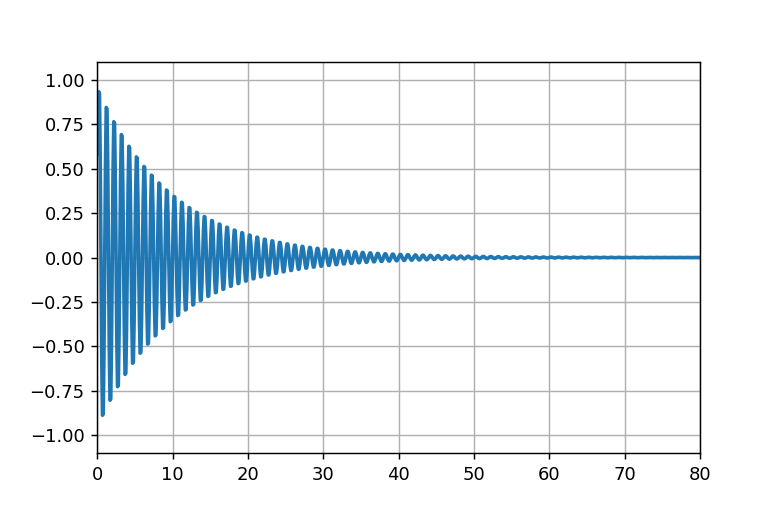

In [8]:
"""
=====
Decay
=====

This example showcases a sinusoidal decay animation.
"""



def data_gen(t=0):
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.1
        yield t, np.sin(2*np.pi*t) * np.exp(-t/10.)


def init():
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(0, 10)
    del xdata[:]
    del ydata[:]
    line.set_data(xdata, ydata)
    return line,

fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.grid()
xdata, ydata = [], []


def run(data):
    # update the data
    t, y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()

    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
    line.set_data(xdata, ydata)

    return line,

ani = animation.FuncAnimation(fig, run, data_gen, blit=False, interval=10,
                              repeat=False, init_func=init)
plt.show()

<IPython.core.display.Javascript object>


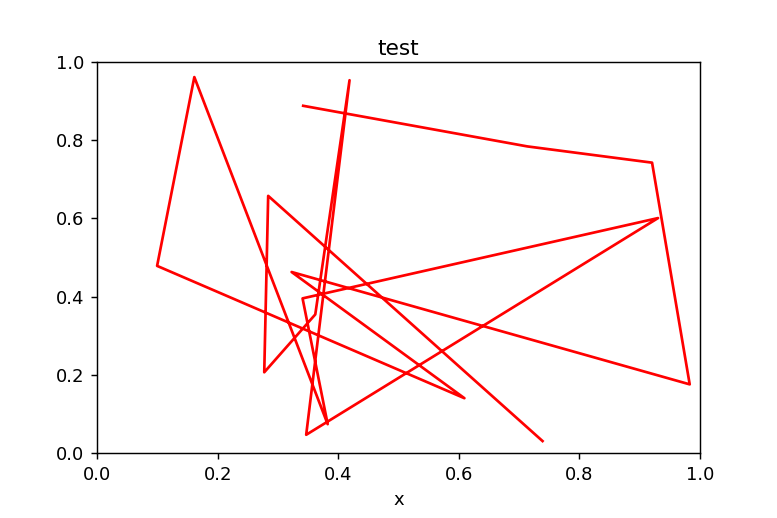

In [22]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
plt.show()
# To save the animation, use the command: line_ani.save('lines.mp4')

<IPython.core.display.Javascript object>


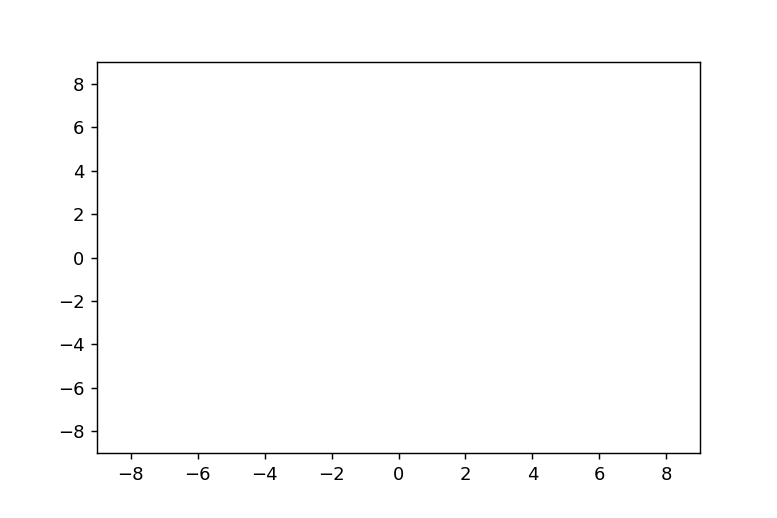

In [14]:
fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()

<IPython.core.display.Javascript object>


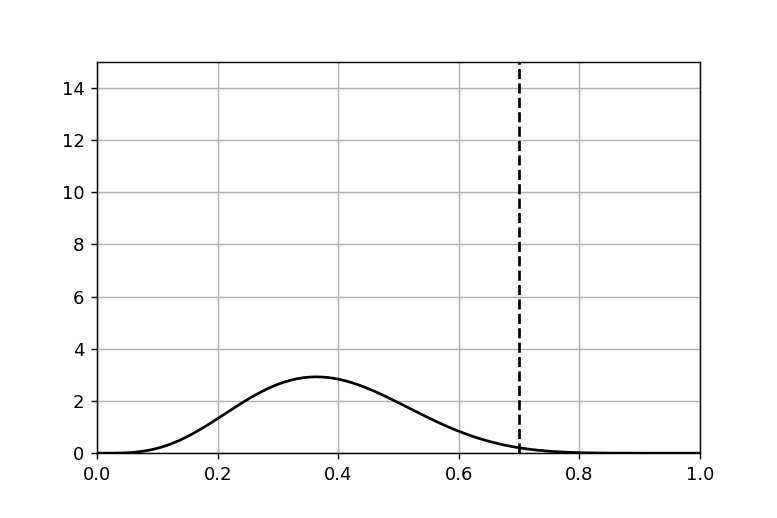

In [15]:
"""
================
The Bayes update
================

This animation displays the posterior estimate updates as it is refitted when
new data arrives.
The vertical line represents the theoretical value to which the plotted
distribution should converge.
"""

# update a distribution based on new data.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.animation import FuncAnimation


class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)

        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
        y = ss.beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
        self.line.set_data(self.x, y)
        return self.line,

fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init,
                     interval=100, blit=True)
plt.show()

<IPython.core.display.Javascript object>


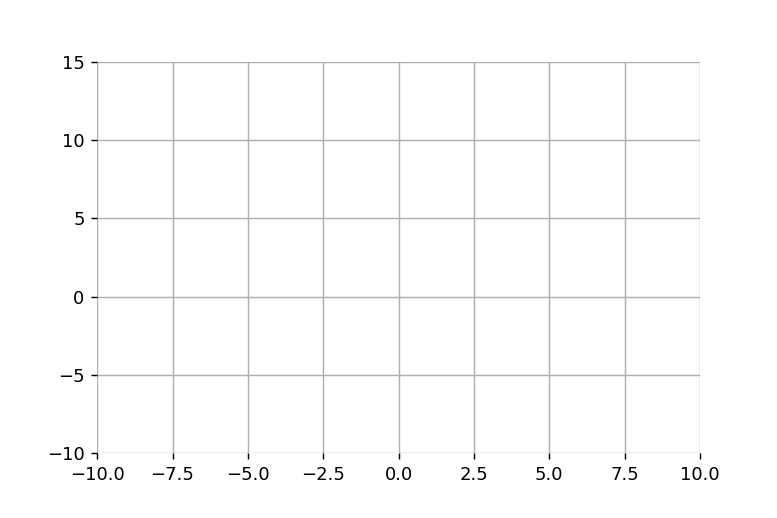

In [21]:
class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(-10, 10, 200)
        self.y = np.sin(x)
        self.ax = ax

        # Set up plot parameters
        self.ax.set_xlim(-10, 10)
        self.ax.set_ylim(-10, 15)
        self.ax.grid(True)

    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,

    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()

        self.line.set_data(self.x[:i], self.y[:i])
        return self.line,

fig, ax = plt.subplots()
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, interval=50, blit=True)
plt.show()

<IPython.core.display.Javascript object>


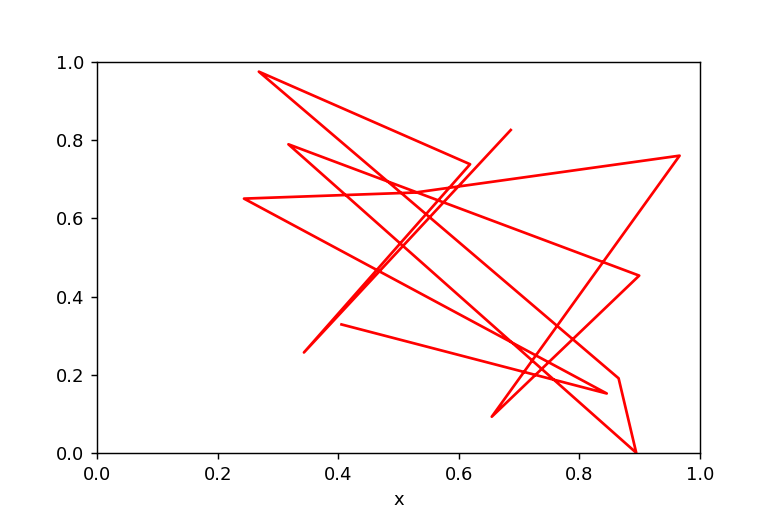

In [26]:
def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig, ax = plt.subplots()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel('x')
line_ani = animation.FuncAnimation(fig, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)
fig.show()
# To save the animation, use the command: line_ani.save('lines.mp4')

<IPython.core.display.Javascript object>


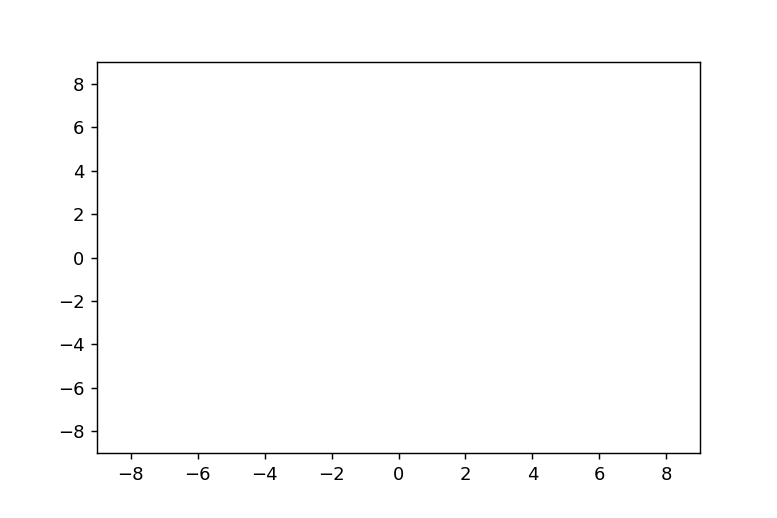

In [30]:
fig, ax = plt.subplots()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((ax.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

fig.show()

/Users/lackey/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


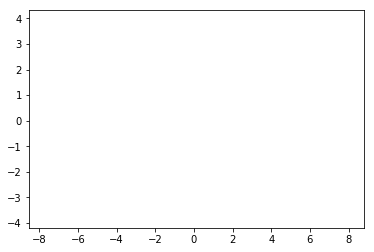

In [55]:
t = np.linspace(0, 50, 400)
x = 8.*(1-0.5*t/t[-1])*np.cos(t)
y = 4.*(1-0.5*t/t[-1])*np.sin(t)

fig, ax = plt.subplots()
    
ims = []
for i in range(400):
    ims.append(ax.plot(x[max(0, i-100):i], y[max(0, i-100):i], c='k', ls='-'))

im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=0,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

fig.show()

In [54]:
%matplotlib inline

print plt.get_backend()

from IPython.display import HTML
HTML(im_ani.to_html5_video())

module://ipykernel.pylab.backend_inline


<IPython.core.display.Javascript object>


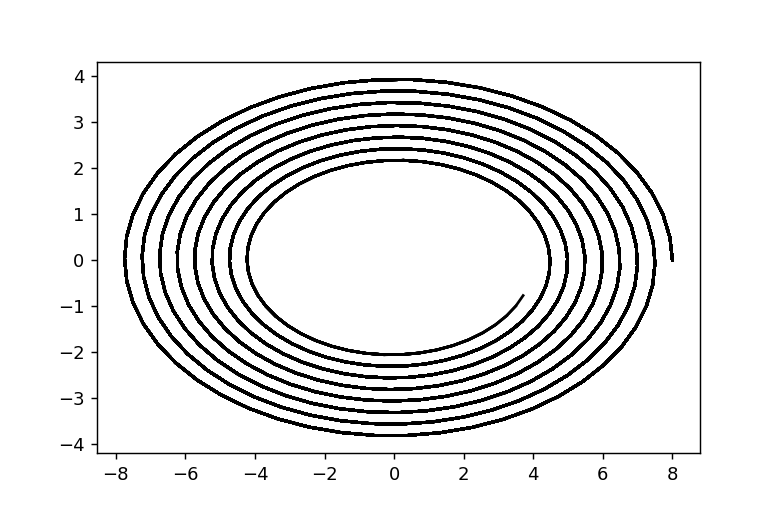

In [51]:
t = np.linspace(0, 50, 400)
x = 8.*(1-0.5*t/t[-1])*np.cos(t)
y = 4.*(1-0.5*t/t[-1])*np.sin(t)

fig, ax = plt.subplots()
    
ims = []
for i in range(400):
    ax.plot(x[max(0, i-100):i], y[max(0, i-100):i], c='k', ls='-')
    ims.append(ax)

im_ani = animation.ArtistAnimation(fig, ims, interval=50, repeat_delay=0,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

fig.show()